In [1]:
import pandas
import glob
import matplotlib

temp_dfs = []
for file in glob.glob("./prediction/segmentation/**/*.csv"):
    temp_dfs.append(pandas.read_csv(file))
    temp_dfs[-1]["MSS"] = file.split("/")[-2]

df = pandas.concat(temp_dfs)

df["color"] = df["filename"].str.contains("color")
df["folio"] = df["filename"].apply(lambda string: "-".join(string.split("-")[:2]).split(".")[0])
df = df.sort_values(by=["color", "MSS", "folio"])

# Checking, it should be equal
df.groupby(by="color").count()

,filename,NbLinesTruth,NbLinesProposed,NbLinesCorrect,LinesIU,LinesFMeasure,LinesRecall,LinesPrecision,MatchedPixelIU,MatchedPixelFMeasure,MatchedPixelPrecision,MatchedPixelRecall,PixelIU,PixelFMeasure,PixelPrecision,PixelRecall,MSS,folio
color,,,,,,,,,,,,,,,,,,
False,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
True,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


\begin{tabular}{lrrr}
\toprule
               mss &  delta-LinesFMeasure &  delta-MatchedPixelFMeasure &  delta-PixelFMeasure \\
\midrule
fr13496, 245v-246r &                 0.00 &                       -0.04 &                -0.03 \\
fr13496, 246v-247r &                 0.00 &                        0.02 &                 0.02 \\
fr13496, 247v-248r &                 0.32 &                        0.00 &                 0.00 \\
fr17229, 163v-164r &                 0.31 &                        0.02 &                 0.25 \\
fr17229, 164v-165r &                 0.31 &                        0.00 &                 0.01 \\
fr17229, 166v-167r &                 0.31 &                       -0.06 &                -0.06 \\
fr17229, 167v-168r &                -0.96 &                        0.00 &                -0.45 \\
fr17229, 168v-169r &                 0.35 &                       -0.01 &                 0.07 \\
  fr411, 125v-126r &                 0.32 &                        0.11 &     

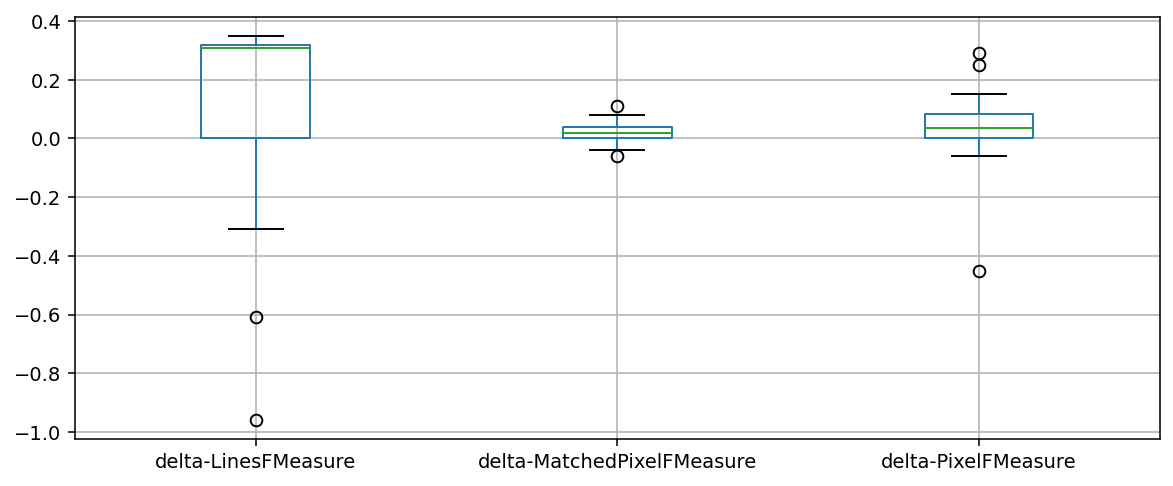

In [2]:
def compare(dataframe, measure):
    metadata = dataframe[dataframe["color"] == True]
    colored = dataframe[dataframe["color"] == True][measure]
    microfilm = dataframe[dataframe["color"] == False][measure]

    arr = 100 * (colored.to_numpy() - microfilm.to_numpy())
    
    return pandas.DataFrame([
        {f"delta-{measure}": score, "mss": f"{row.MSS}, {row.folio}"}
        for score, (_, row) in zip(arr, metadata.iterrows())
    ])

out = pandas.concat([
    compare(df, "LinesFMeasure"),
    compare(df, "MatchedPixelFMeasure"),
    compare(df, "PixelFMeasure")
], axis=1)[["mss", "delta-LinesFMeasure", "delta-MatchedPixelFMeasure", "delta-PixelFMeasure"]]
out.columns = ["mss", "mss1", "mss1", "delta-LinesFMeasure", "delta-MatchedPixelFMeasure", "delta-PixelFMeasure"]

out = out[["mss", "delta-LinesFMeasure", "delta-MatchedPixelFMeasure", "delta-PixelFMeasure"]]
print(
    out.to_latex(index=False)
)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4), dpi=140)
out.boxplot(ax=plt.gca())

print(out.describe().to_latex())